##Support Vector Machines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn import svm, datasets, metrics

iris = datasets.load_iris()

In [7]:
#Ising SVMs for the iris data set

classifier = svm.SVC().fit(iris.data, iris.target)
classifier.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
print metrics.classification_report(classifier.predict(iris.data), iris.target)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      1.00      0.98        48
          2       1.00      0.96      0.98        52

avg / total       0.99      0.99      0.99       150



#Kernels

In [9]:
#SVC() is the standard kernel. We can compare with other kernels.

In [11]:
# To plot things nicely we will concentrate on just the first 2 features

X = iris.data[:,:2]
Y = iris.target

# To create a plot we need a grid, and therefore we need the size of the grid.
h = 0.2

In [22]:
# We create an instance for SVM to fit our data
C = 1.0
svc = svm.SVC(kernel = 'linear', C = C).fit(X,Y)
rbf = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(X, Y)
poly_svm = svm.SVC(kernel = 'poly', degree = 3, C = C).fit(X, Y)
lin_svc = svm.LinearSVC(C = C).fit(X, Y)

In [25]:
#Create a mesh
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Titles for the plot
titles = ['SVC with Linear Kernel', 
          'SVC with RBF kernel', 
          'SVC with polynomial (d=3) kernel', 
          'Linear SVC (linear kernel)']

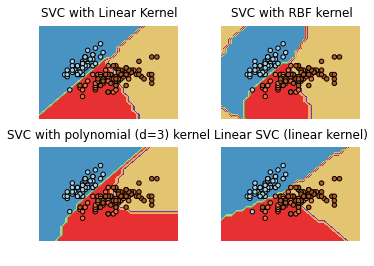

In [28]:
#Let us create the plots!!!

for i, clf in enumerate((svc, rbf, poly_svm, lin_svc)):
    
    #Plot the decision boundary. For this we will assign a colour
    #to each point in the mesh
    plt.subplot(2, 2, i+1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #put the result into a colour plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    
    #Let us also plot the training points
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.Paired)
    
    plt.title(titles[i])

In [29]:
# SVR Implementation for Regression
# Support Vector Machines can also be used for regression problems! 
# Lets compare the results of a couple kernels on ...the original mammals data set. 
# Compare the results of each ...fit afterwords with adjusted r-squared and MSE.

In [30]:
from pandas import DataFrame, read_csv
from sklearn import svm, datasets, metrics
import numpy as pn
import matplotlib.pyplot as plt

In [55]:
mammals = read_csv('mammals.csv').sort('body')
lm = svm.SVR(kernel = 'linear', C = 1e1)
lm_rbf = svm.SVR(kernel = 'rbf', gamma = 10, C = 100)

In [56]:
body = mammals[['body']].values
brain = mammals.brain.values

In [57]:
lm.fit(body, brain)
lm_rbf.fit(np.log(body), np.log(brain))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
##Compare to the original log fit model, as well as other svm kernels:
from sklearn.linear_model import LinearRegression
logfit = LinearRegression().fit(np.log(body), np.log(brain))
mammals['log_regr'] = np.exp(logfit.predict(np.log(body)))
mammals['linear_svm'] = lm.predict(body)
mammals['rbf_svm'] = np.exp(lm_rbf.predict(np.log(body))) 


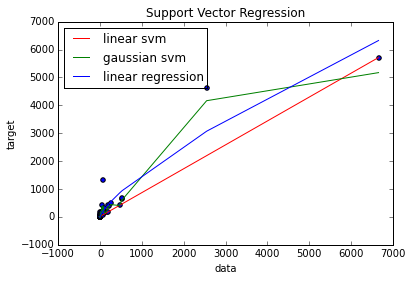

In [59]:
##Now, print the dataframe and see how it goes!

plt.scatter(body, brain)
plt.plot(body, mammals['linear_svm'].values, c = 'r', label = 'linear svm')
plt.plot(body, mammals['rbf_svm'].values, c = 'g', label = 'gaussian svm')
plt.plot(body, mammals['log_regr'].values, c = 'b', label = 'linear regression')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend(loc = 2)
plt.show()

In [38]:
for prediction in ('linear_svm','rbf_svm', 'log_regr'):
    print 'Mean Squared Error for', prediction, ':', metrics.mean_squared_error(mammals[ [prediction] ].values, mammals[ ['brain'] ].values)
    print'R-Squared for', prediction, ':', metrics.r2_score(mammals[ [prediction] ].values, mammals[['brain']].values)

Mean Squared Error for linear_svm : 127678.924899
R-Squared for linear_svm : 0.781076125623
Mean Squared Error for rbf_svm : 31350.2054557
R-Squared for rbf_svm : 0.954083048449
Mean Squared Error for log_regr : 74318.9018679
R-Squared for log_regr : 0.905638297817


In [39]:
mammals

,Name,body,brain,log_regr,linear_svm,rbf_svm
13,Lesser short-tailed shrew,0.005,0.14,0.157571,14.992015,0.154704
39,Little brown bat,0.010,0.25,0.265311,14.996296,0.276266
38,Mouse,0.023,0.40,0.496205,15.007428,0.361904
19,Big brown bat,0.023,0.30,0.496205,15.007428,0.361904
54,Musk shrew,0.048,0.33,0.862650,15.028834,0.419861
14,Star-nosed mole,0.060,1.00,1.020188,15.039109,0.726971
52,E. American mole,0.075,1.20,1.206497,15.051953,1.326519
10,Ground squirrel,0.101,4.00,1.509000,15.074216,2.479862
60,Tree shrew,0.104,2.50,1.542569,15.076785,2.593577
37,Golden hamster,0.120,1.00,1.717752,15.090485,3.101336
